# Lec2 Grover's Argorithm
Reference
- [[Youtube]【誰でも量子コンピュータ！量子アルゴリズム編】Quantum Computing for You【第2回・9/16実施】](https://www.youtube.com/watch?v=ZSqYDf_vSAo&list=TLGGjihUoF88W5MyMjA0MjAyNA)
- [[Youtube] 量子コンピュータ授業 #4　グローバーのアルゴリズム](https://www.youtube.com/watch?v=U6HszEyIuEw)
- [[Qiita] Groverのアルゴリズム](https://qiita.com/shnchr/items/4160d2d066873824e35e)

In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit_aer import Aer
from qiskit.visualization import array_to_latex

In [2]:
n = 2
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

In [3]:
# qc.h(qr[0])
# qc.h(qr[1])

qc.h(qr) # コレでいっぺんに全ての量子ビットにHadamardゲートをつけることができる。

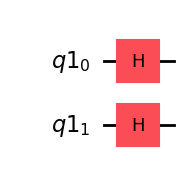

In [4]:
qc.draw('mpl')

In [5]:
sim = Aer.get_backend('statevector_simulator')

In [6]:
res = sim.run(qc).result()
print(res.data()['statevector'])

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


$\ket{\psi} = \frac{1}{2}\ket{00} + \frac{1}{2}\ket{01} + \frac{1}{2}\ket{10} + \frac{1}{2}\ket{11}$

In [7]:
# Control Z
# qr[0]は制御ビット、qr[1]は対象ビット
# Z変換は、\0> -> \0>, \1> -> -\1>
# qr[0]が\0>のときは対象ビットは何もしない、qr[0]が\1>のときは対象ビットはZ変換する。
qc.cz(qr[0], qr[1]) 

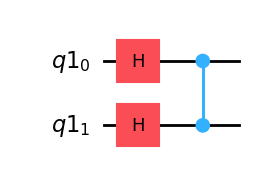

In [8]:
qc.draw('mpl')

上図の様に回路図が対象になる理由は、Control Zは制御ビットと対象ビットを入れ替えても結果が変わらないから。

In [9]:
# 量子回路qcをシミュレートする。
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state =')

<IPython.core.display.Latex object>

よって、Control Zは$\ket{11}$を$-\ket{11}$にする作用を持つ。他($\ket{00}, \ket{01}, \ket{10}$)は変化させない。

### Control ZがHadamardとXで作ることができることの説明

In [10]:
n = 1
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

In [11]:
qc.h(qr[0])
qc.x(qr[0]) # Xはビット反転
qc.h(qr[0])

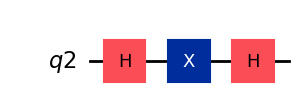

In [12]:
qc.draw('mpl')

In [13]:
# 量子回路qcをシミュレートする。
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state =')

<IPython.core.display.Latex object>

$H\ket{0} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$, $H\ket{1} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$
であることに注意すると、  
入力が$\ket{0}$のとき、
$$
\begin{align}
    HXH\ket{0} &= HX(\frac{1}{\sqrt{2}}(\ket{0} + \ket{1})) \\
               &= H(\frac{1}{\sqrt{2}}(\ket{0} + \ket{1})) \\
               &= \frac{1}{\sqrt{2}}(H\ket{0} + H\ket{1}) \\
               &= \frac{1}{\sqrt{2}}(\frac{1}{\sqrt{2}}(\ket{0} + \ket{1}) + \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})) \\
               &= \ket{0}
\end{align}
$$
入力が$\ket{1}$のとき、
$$
\begin{align}
    HXH\ket{1} &= HX(\frac{1}{\sqrt{2}}(\ket{0} - \ket{1})) \\
               &= H(\frac{1}{\sqrt{2}}(\ket{1} - \ket{0})) \\
               &= \frac{1}{\sqrt{2}}(H\ket{1} - H\ket{0}) \\
               &= \frac{1}{\sqrt{2}}(\frac{1}{\sqrt{2}}(\ket{0} - \ket{1}) - \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})) \\
               &= -\ket{1}
\end{align}
$$
以上をまとめると、
$$
\begin{align}
    HXH\ket{0} &= \ket{0} \\
    HXH\ket{1} &= -\ket{1} 
\end{align}
$$
となることがわかるため、$HXH = Z$であることが結論付けられる。  
同様に、実は$HZH = X$であることも分かる。  
またHadamardゲートの特徴として、重ね合わせ状態を作る働きもあるし、逆に重ね合わせ状態が入力されたら重ね合わせを解く（確定的にする）働きもする。

In [14]:
n = 1
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

# 入力ビットを\1>に初期化する。
qc.initialize([0, 1], 0)

In [15]:
qc.h(qr[0])
qc.x(qr[0]) # Xはビット反転
qc.h(qr[0])

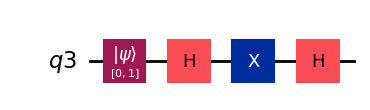

In [16]:
qc.draw('mpl')

In [17]:
# 量子回路qcをシミュレートする。
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state =')

<IPython.core.display.Latex object>

ZがXを使って作れたのと同様に、CZもCXを使って作ることができる。以後、それを見ていく。

In [18]:
n = 2
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

In [19]:
qc.h(qr) # 4通りの入力を全て確認するのは面倒なので、両ビット共に\0>にHadamardゲートを掛けて重ね合わせ状態を作っておく。

qc.h(qr[1])
qc.cx(qr[0], qr[1])
qc.h(qr[1])

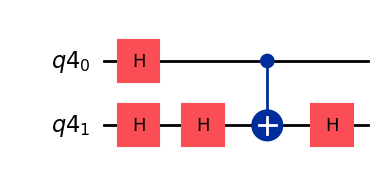

In [20]:
qc.draw('mpl')

In [21]:
qc.draw()

┌───┐               
q4_0: ┤ H ├───────■───────
      ├───┤┌───┐┌─┴─┐┌───┐
q4_1: ┤ H ├┤ H ├┤ X ├┤ H ├
      └───┘└───┘└───┘└───┘

In [22]:
# 量子回路qcをシミュレートする。
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state =')

<IPython.core.display.Latex object>

この結果により、$\ket{11}$だけ符号が反転することが分かるので、コレはCZゲートを実現していることが分かる。

---
## Groverのアルゴリズム
重ね合わせ状態から、一つほしい状態を探索するためのアルゴリズム

In [23]:
n = 5
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

In [24]:
# まず重ね合わせ状態を作る。
qc.h(qr)

In [25]:
# 符号を反転させたい番号
N = 12
binN = format(N, '05b') #5桁の2進数にする。
print(binN)
# ビットが0のやつを、1に反転する。
for k in range(n):
    if binN[n-1-k] == '0':
        qc.x(qr[k])

01100


In [26]:
# 多重制御Zゲートを作りたいが、mczはライブラリに無いので、以下のようにして作る。
qc.h(qr[n-1])
qc.mcx(qr[:n-1] ,qr[n-1]) # 多重制御Xゲート。qr[:n-1]は制御ビット、qr[n-1]は対象ビット
qc.h(qr[n-1])

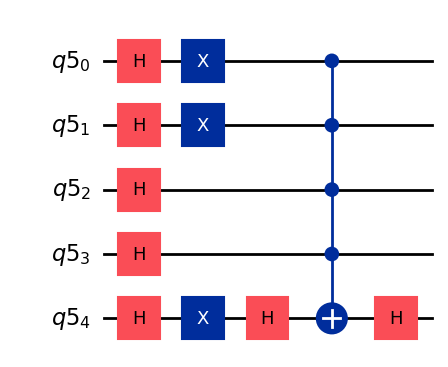

In [27]:
qc.draw('mpl')

In [28]:
qc.draw()

┌───┐┌───┐               
q5_0: ┤ H ├┤ X ├───────■───────
      ├───┤├───┤       │       
q5_1: ┤ H ├┤ X ├───────■───────
      ├───┤└───┘       │       
q5_2: ┤ H ├────────────■───────
      ├───┤            │       
q5_3: ┤ H ├────────────■───────
      ├───┤┌───┐┌───┐┌─┴─┐┌───┐
q5_4: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
      └───┘└───┘└───┘└───┘└───┘

In [29]:
# ビットをもとに戻す。
for k in range(n):
    if binN[n-1-k] == '0':
        qc.x(qr[k])

In [30]:
# 量子回路qcをシミュレートする。
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state =')

<IPython.core.display.Latex object>

$0.17677...$は$\frac{1}{\sqrt{32}}$を意味している。

In [31]:
state

Statevector([ 0.1767767-2.16489014e-17j,  0.1767767-2.16489014e-17j,
              0.1767767-2.16489014e-17j,  0.1767767-2.16489014e-17j,
              0.1767767-2.16489014e-17j,  0.1767767-2.16489014e-17j,
              0.1767767-2.16489014e-17j,  0.1767767-2.16489014e-17j,
              0.1767767-2.16489014e-17j,  0.1767767-2.16489014e-17j,
              0.1767767-2.16489014e-17j,  0.1767767-2.16489014e-17j,
             -0.1767767+4.32978028e-17j,  0.1767767-2.16489014e-17j,
              0.1767767-2.16489014e-17j,  0.1767767-2.16489014e-17j,
              0.1767767+4.62223187e-33j,  0.1767767+4.62223187e-33j,
              0.1767767+4.62223187e-33j,  0.1767767+4.62223187e-33j,
              0.1767767+4.62223187e-33j,  0.1767767+4.62223187e-33j,
              0.1767767+4.62223187e-33j,  0.1767767+3.08148791e-33j,
              0.1767767+4.62223187e-33j,  0.1767767+4.62223187e-33j,
              0.1767767+4.62223187e-33j,  0.1767767+3.08148791e-33j,
              0.1767767-2.16489014

In [32]:
state[N]

(-0.17677669529663692+4.329780281177467e-17j)

In [33]:
def oracle(N, n):
    '''
    '''
    if N > 2**n -1:
        n = 2**n -1
    qc = QuantumCircuit()
    qr = QuantumRegister(n)
    qc.add_register(qr)
    binN = format(N, f'0{n}b')
    print('binN =', binN)
    # 所望の状態を|11111>にする。
    for k in range(n):
        if binN[n-1-k] == '0':
            print(f"k = {k}, n-1-k = {n-1-k}: ****************")
            qc.x(qr[k])
    # 多重制御Zゲート
    qc.h(qr[n-1])
    qc.mcx(qr[:n-1] ,qr[n-1])
    qc.h(qr[n-1])
    # |11111>を所望の状態に戻す。
    for k in range(n):
        if binN[n-1-k] == '0':
            qc.x(qr[k])
    # これまで作ってきた量子回路を、一つの量子ゲートにまとめる。
    Uoracle = qc.to_gate()
    Uoracle.name = 'Uoracle'
    return Uoracle

In [34]:
n = 5
N = 22

# 初期化
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

# 重ね合わせの状態を作る
qc.h(qr)

# 自作回路を呼び出す。
Uoracle = oracle(N, n)
qc.append(Uoracle, qr)

binN = 10110
k = 0, n-1-k = 4: ****************
k = 3, n-1-k = 1: ****************


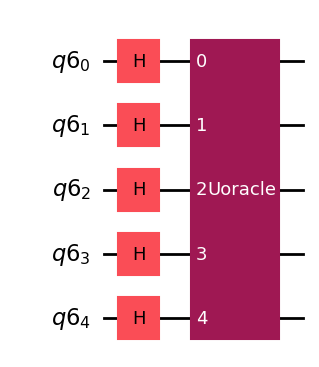

In [35]:
qc.draw('mpl')

In [36]:
qc.draw()

┌───┐┌──────────┐
q6_0: ┤ H ├┤0         ├
      ├───┤│          │
q6_1: ┤ H ├┤1         ├
      ├───┤│          │
q6_2: ┤ H ├┤2 Uoracle ├
      ├───┤│          │
q6_3: ┤ H ├┤3         ├
      ├───┤│          │
q6_4: ┤ H ├┤4         ├
      └───┘└──────────┘

In [37]:
# このままシミュレートすると怒られる。qiskit.transpileを使って、シミュレータに分かるように焼き直す手続きが必要。
from qiskit import transpile
sim = Aer.get_backend('statevector_simulator')
qc = transpile(qc, backend=sim)
res = sim.run(qc).result()
state = res.data()["statevector"]
array_to_latex(state,prefix="state = ")

<IPython.core.display.Latex object>

In [38]:
state

Statevector([ 0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767-2.16489014e-17j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
             -0.1767767+2.16489014e-17j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000e+00j,  0.1767767+0.00000000e+00j,
              0.1767767+0.00000000

---

In [39]:
n = 2
qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

In [40]:
# 量子回路qcをシミュレートする。
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state =')

<IPython.core.display.Latex object>

In [41]:
qc.h(qr)

In [42]:
# 量子回路qcをシミュレートする。
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state =')

<IPython.core.display.Latex object>

In [43]:
qc.cz(qr[0], qr[1])

In [44]:
# 量子回路qcをシミュレートする。
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state =')

<IPython.core.display.Latex object>

In [45]:
qc.h(qr)

In [46]:
qc.draw()

┌───┐   ┌───┐
q11_0: ┤ H ├─■─┤ H ├
       ├───┤ │ ├───┤
q11_1: ┤ H ├─■─┤ H ├
       └───┘   └───┘

In [47]:
# 量子回路qcをシミュレートする。
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state =')

<IPython.core.display.Latex object>

In [48]:
# |00>の符号を反転させたい。
# |00>を|11>にする。
qc.x(qr)
qc.cz(qr[0], qr[1])
# |11>を|00>に戻す。
qc.x(qr)

In [49]:
# 量子回路qcをシミュレートする。
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state =')

<IPython.core.display.Latex object>

In [50]:
qc.h(qr)

In [51]:
# 量子回路qcをシミュレートする。
sim = Aer.get_backend('statevector_simulator')
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state =')

<IPython.core.display.Latex object>

In [52]:
qc.draw()

┌───┐   ┌───┐┌───┐   ┌───┐┌───┐
q11_0: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├
       ├───┤ │ ├───┤├───┤ │ ├───┤├───┤
q11_1: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├
       └───┘   └───┘└───┘   └───┘└───┘

In [53]:
def diffusion(n):
    qc = QuantumCircuit()
    qr = QuantumRegister(n)
    qc.add_register(qr)
    # 重ね合わせ状態の崩れ具合を調べる。
    qc.h(qr)
    # |00...0>を|11...1>に変換する。
    qc.x(qr)
    # 多重制御Zゲート mcz = H mcx H |11...1>の係数を反転させる。
    qc.h(qr[n-1])
    qc.mcx(qr[:n-1], qr[n-1])
    qc.h(qr[n-1])
    # |11...1>を|00...0>に戻す。
    qc.x(qr)
    # 重ね合わせの状態を解く
    qc.h(qr)

    Udiff = qc.to_gate()
    Udiff.name = 'Udiff'
    return Udiff

In [54]:
n = 5
N = 22

Tall = 5

qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

# 重ね合わせ状の態でスタートする。
qc.h(qr)
Uoracle = oracle(N, n)
Udiff = diffusion(n)

for k in range(Tall):
    qc.append(Uoracle, qr)
    qc.append(Udiff, qr)


binN = 10110
k = 0, n-1-k = 4: ****************
k = 3, n-1-k = 1: ****************


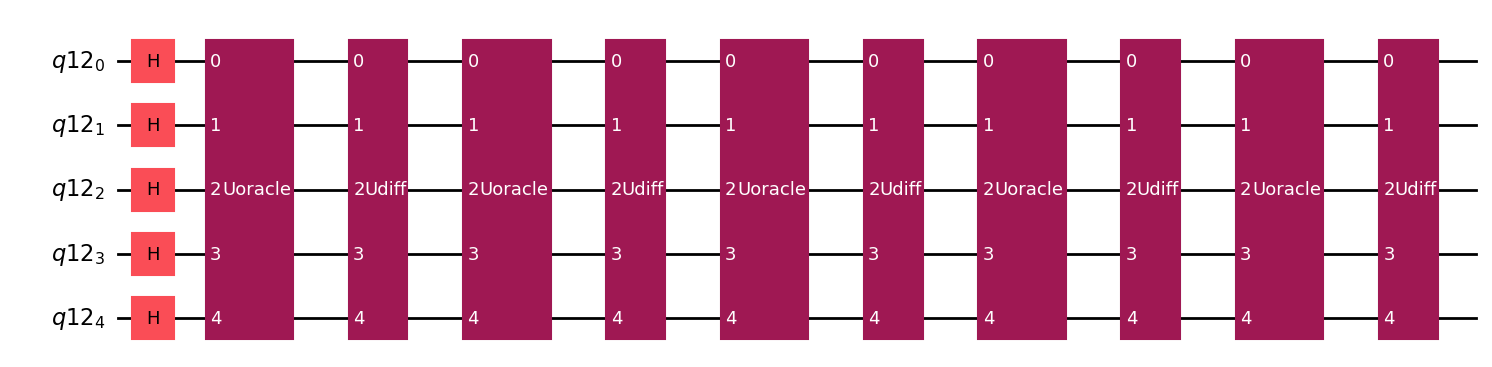

In [55]:
qc.draw('mpl')

In [56]:
qc.draw()

┌───┐┌──────────┐┌────────┐┌──────────┐┌────────┐┌──────────┐┌────────┐»
q12_0: ┤ H ├┤0         ├┤0       ├┤0         ├┤0       ├┤0         ├┤0       ├»
       ├───┤│          ││        ││          ││        ││          ││        │»
q12_1: ┤ H ├┤1         ├┤1       ├┤1         ├┤1       ├┤1         ├┤1       ├»
       ├───┤│          ││        ││          ││        ││          ││        │»
q12_2: ┤ H ├┤2 Uoracle ├┤2 Udiff ├┤2 Uoracle ├┤2 Udiff ├┤2 Uoracle ├┤2 Udiff ├»
       ├───┤│          ││        ││          ││        ││          ││        │»
q12_3: ┤ H ├┤3         ├┤3       ├┤3         ├┤3       ├┤3         ├┤3       ├»
       ├───┤│          ││        ││          ││        ││          ││        │»
q12_4: ┤ H ├┤4         ├┤4       ├┤4         ├┤4       ├┤4         ├┤4       ├»
       └───┘└──────────┘└────────┘└──────────┘└────────┘└──────────┘└────────┘»
«       ┌──────────┐┌────────┐┌──────────┐┌────────┐
«q12_0: ┤0         ├┤0       ├┤0         ├┤0       ├
«       │          ││        ││          ││        │
«q12_1: ┤1         ├┤1       ├┤1         ├┤1       ├
«       │          ││        ││          ││        │
«q12_2: ┤2 Uoracle ├┤2 Udiff ├┤2 Uoracle ├┤2 Udiff ├
«       │          ││        ││          ││        │
«q12_3: ┤3         ├┤3       ├┤3         ├┤3       ├
«       │          ││        ││          ││        │
«q12_4: ┤4         ├┤4       ├┤4         ├┤4       ├
«       └──────────┘└────────┘└──────────┘└────────┘

In [57]:
# 量子回路qcをシミュレートする。
sim = Aer.get_backend('statevector_simulator')
qc = transpile(qc, backend=sim)
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state =')

<IPython.core.display.Latex object>

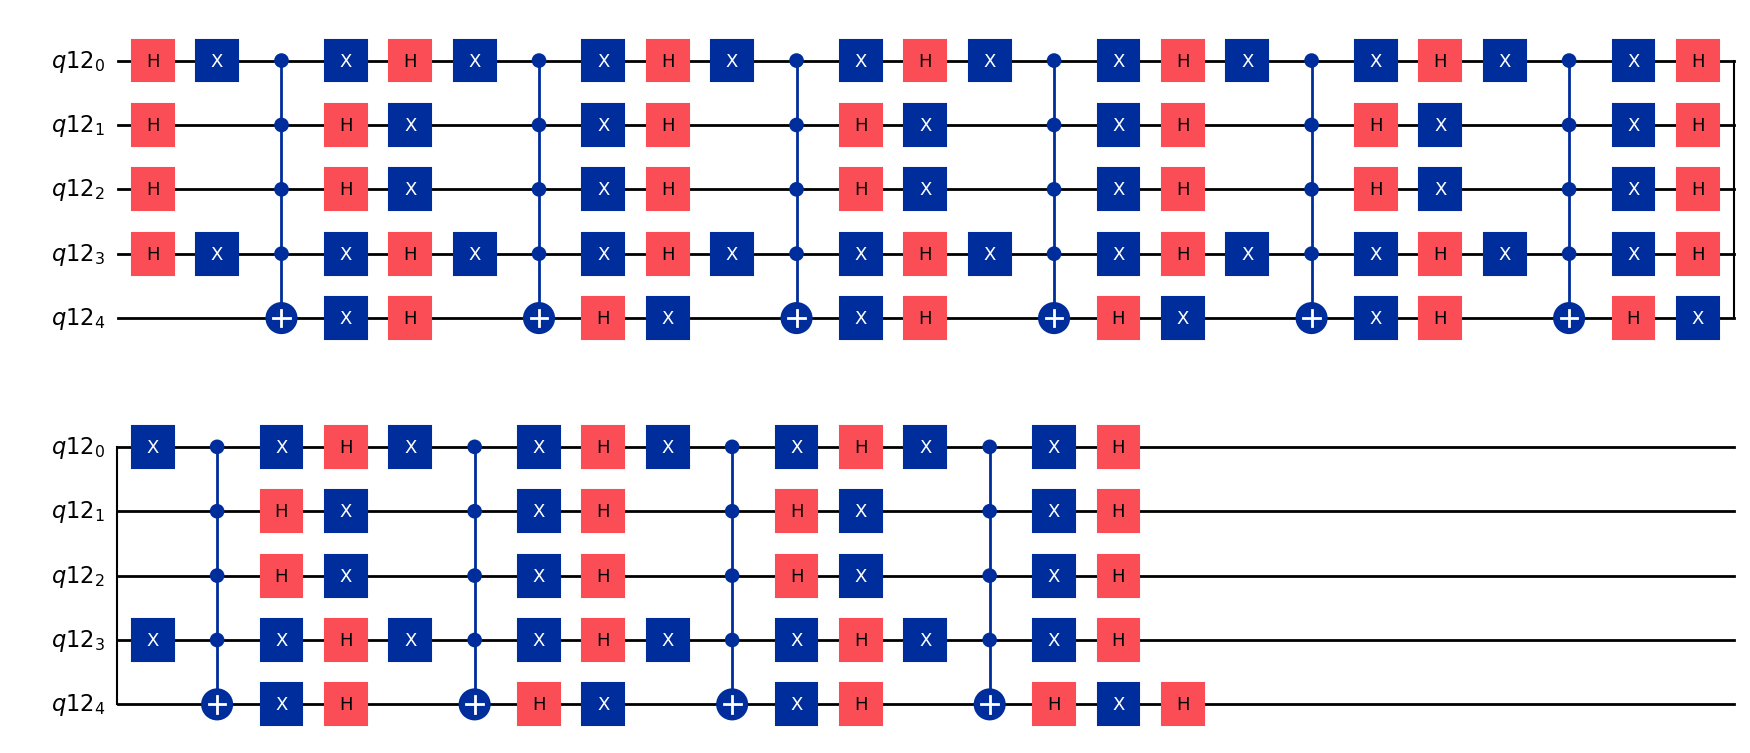

In [58]:
qc.draw('mpl')

In [59]:
qc.draw()

┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐»
q12_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├»
       ├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘»
q12_1: ┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├─────»
       ├───┤       │  ├───┤├───┤       │  ├───┤├───┤       │  ├───┤├───┤     »
q12_2: ┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├─────»
       ├───┤┌───┐  │  ├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐»
q12_3: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├»
       └───┘└───┘┌─┴─┐├───┤├───┤└───┘┌─┴─┐├───┤├───┤└───┘┌─┴─┐├───┤├───┤└───┘»
q12_4: ──────────┤ X ├┤ X ├┤ H ├─────┤ X ├┤ H ├┤ X ├─────┤ X ├┤ X ├┤ H ├─────»
                 └───┘└───┘└───┘     └───┘└───┘└───┘     └───┘└───┘└───┘     »
«            ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐»
«q12_0: ──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├»
«         │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤»
«q12_1: ──■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├»
«         │  ├───┤├───┤       │  ├───┤├───┤       │  ├───┤├───┤       │  ├───┤»
«q12_2: ──■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├»
«         │  ├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐  │  ├───┤»
«q12_3: ──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├»
«       ┌─┴─┐├───┤├───┤└───┘┌─┴─┐├───┤├───┤└───┘┌─┴─┐├───┤├───┤└───┘┌─┴─┐├───┤»
«q12_4: ┤ X ├┤ H ├┤ X ├─────┤ X ├┤ X ├┤ H ├─────┤ X ├┤ H ├┤ X ├─────┤ X ├┤ X ├»
«       └───┘└───┘└───┘     └───┘└───┘└───┘     └───┘└───┘└───┘     └───┘└───┘»
«       ┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐     
«q12_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├─────
«       ├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤     
«q12_1: ┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
«       ├───┤       │  ├───┤├───┤       │  ├───┤├───┤       │  ├───┤├───┤     
«q12_2: ┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────
«       ├───┤┌───┐  │  ├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐  │  ├───┤├───┤     
«q12_3: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├─────
«       ├───┤└───┘┌─┴─┐├───┤├───┤└───┘┌─┴─┐├───┤├───┤└───┘┌─┴─┐├───┤├───┤┌───┐
«q12_4: ┤ H ├─────┤ X ├┤ H ├┤ X ├─────┤ X ├┤ X ├┤ H ├─────┤ X ├┤ H ├┤ X ├┤ H ├
«       └───┘     └───┘└───┘└───┘     └───┘└───┘└───┘     └───┘└───┘└───┘└───┘

In [60]:
state[N]

(-0.9271659296803556+2.7171353280508516e-15j)

/home/user/anaconda3/envs/quantum/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/user/anaconda3/envs/quantum/lib/python3.9/site-packages/matplotlib/transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


<BarContainer object of 32 artists>

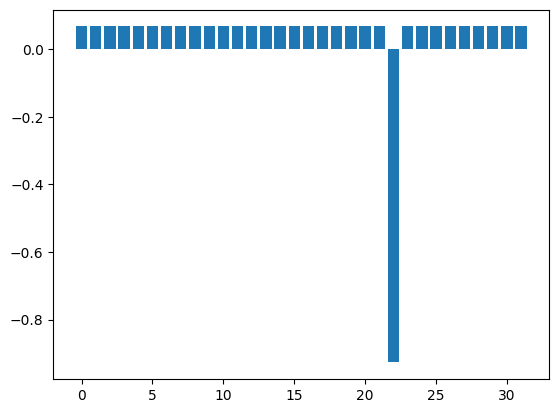

In [61]:
import matplotlib.pyplot as plt
plt.bar(range(2**n), state)

In [62]:
qc.measure_all()

In [63]:
sim = Aer.get_backend('qasm_simulator')
res = sim.run(qc).result()
ans = res.get_counts()

In [64]:
ans

{'00011': 2,
 '11010': 6,
 '00101': 5,
 '01001': 5,
 '10001': 4,
 '11110': 4,
 '10100': 3,
 '10111': 1,
 '11100': 5,
 '10010': 5,
 '10101': 2,
 '10000': 3,
 '00100': 8,
 '00001': 3,
 '00110': 5,
 '01010': 3,
 '10011': 5,
 '01111': 4,
 '10110': 892,
 '01101': 9,
 '01110': 4,
 '11011': 3,
 '11111': 9,
 '11000': 5,
 '00111': 3,
 '00010': 4,
 '00000': 3,
 '11001': 3,
 '11101': 4,
 '01011': 2,
 '01000': 6,
 '01100': 4}

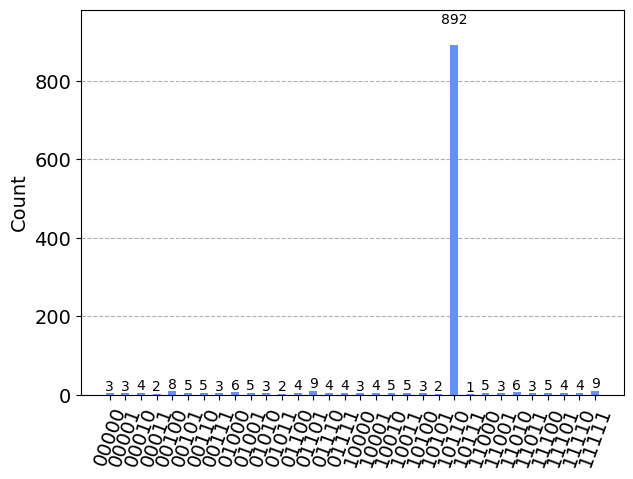

In [65]:
from qiskit.visualization import plot_histogram
plot_histogram(ans)

---
いろいろ実験。

In [66]:
n = 2
N = 3

Tall = 1

qc = QuantumCircuit()
qr = QuantumRegister(n)
qc.add_register(qr)

# 重ね合わせの状態でスタートする。
qc.h(qr)
Uoracle = oracle(N, n)
Udiff = diffusion(n)

for k in range(Tall):
    qc.append(Uoracle, qr)
    qc.append(Udiff, qr)


binN = 11


In [67]:
qc.draw()

┌───┐┌──────────┐┌────────┐
q18_0: ┤ H ├┤0         ├┤0       ├
       ├───┤│  Uoracle ││  Udiff │
q18_1: ┤ H ├┤1         ├┤1       ├
       └───┘└──────────┘└────────┘

In [68]:
# 量子回路qcをシミュレートする。
sim = Aer.get_backend('statevector_simulator')
qc = transpile(qc, backend=sim)
res = sim.run(qc).result()
state = res.data()['statevector']
array_to_latex(state, prefix='state =')

<IPython.core.display.Latex object>

/home/user/anaconda3/envs/quantum/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/user/anaconda3/envs/quantum/lib/python3.9/site-packages/matplotlib/transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


<BarContainer object of 4 artists>

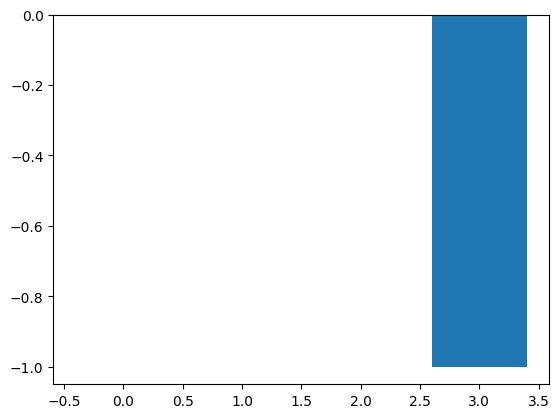

In [69]:
import matplotlib.pyplot as plt
plt.bar(range(2**n), state)

In [70]:
state

Statevector([-1.57009246e-16+2.46519033e-32j,
             -2.22044605e-16-6.12323400e-17j,
             -1.11022302e-16-6.12323400e-17j,
             -1.00000000e+00+3.67394040e-16j],
            dims=(2, 2))


In [71]:
qc.draw()

┌───┐     ┌───┐┌───┐     ┌───┐┌───┐     
q18_0: ┤ H ├──■──┤ H ├┤ X ├──■──┤ X ├┤ H ├─────
       └───┘┌─┴─┐├───┤├───┤┌─┴─┐├───┤├───┤┌───┐
q18_1: ─────┤ X ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├
            └───┘└───┘└───┘└───┘└───┘└───┘└───┘

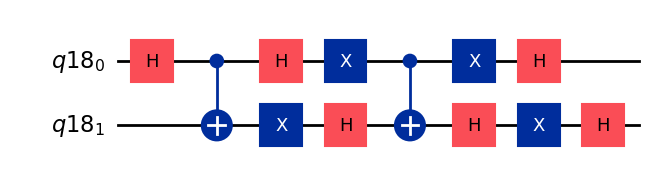

In [72]:
qc.draw('mpl')